<a href="https://colab.research.google.com/github/Manu87DS/py/blob/master/manu/Rakuten_py_DL_1ers_entrainements_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 #import OpenCV -> pip install opencv-python
import numpy as np
import glob

In [ ]:
X_train = pd.read_csv('X_train_update.csv',index_col=0)
y_train = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

In [ ]:
X_train.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [ ]:
import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html

#get current working directory
current_path = os.getcwd() 

#Training images path
images_path = current_path + r'/images/image_train/'

#List with the name of all training images
images_list = os.listdir(images_path)

In [ ]:
#Create a column with the name of the picture
X_train['image name'] = 'image_' + X_train['imageid'].map(str) + '_product_' + X_train['productid'].map(str) + '.jpg'
X_train['image name']

0        image_1263597046_product_3804725264.jpg
1         image_1008141237_product_436067568.jpg
2          image_938777978_product_201115110.jpg
3           image_457047496_product_50418756.jpg
4         image_1077757786_product_278535884.jpg
                          ...                   
84911      image_941495734_product_206719094.jpg
84912    image_1188462883_product_3065095706.jpg
84913     image_1009325617_product_440707564.jpg
84914    image_1267353403_product_3942400296.jpg
84915       image_684671297_product_57203227.jpg
Name: image name, Length: 84916, dtype: object

In [ ]:
#images_red = []
#images_pix = []
#for name in X_train['image name']:
#    img_grey = cv2.imread(images_path + name, cv2.IMREAD_GRAYSCALE)
#    images_red.append(img_grey)
    #images_pix.append(img_grey.ravel())

In [ ]:
# creation des répertoires

#CREATE A FOLDER PER CATEGORY

#list of categories
categories = list(set(y_train['prdtypecode'].to_list()))

#create a folder per category inside images/images_train
for category in categories:
    os.mkdir('images/image_train/' + str(category))

#MOVE PICTURE TO ITS FOLDER CATEGORY

#Put image names and categories in lists
image_name_list = X_train['image name'].to_list()
category_list = y_train['prdtypecode'].to_list()

#move pictures from images/image_train to images/image_train/category
for image_name, category in zip(image_name_list, category_list):
    os.rename('images/image_train/' + image_name, 'images/image_train/' + str(category) + '/' + image_name)

In [ ]:
# préparation mdele deep

In [ ]:
#APPLY SOME TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(64,64), batch_size=32, class_mode = 'categorical') ###

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


Found 195132 images belonging to 6 classes.
Found 195132 images belonging to 6 classes.


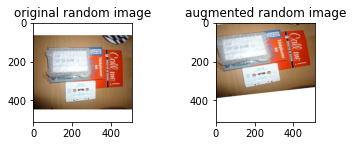

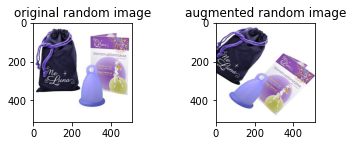

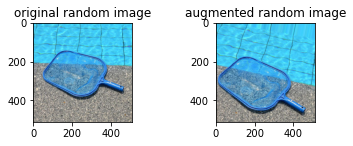

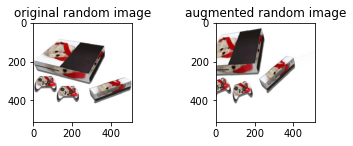

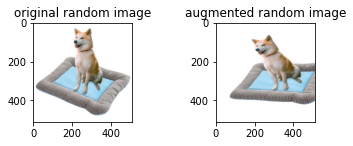

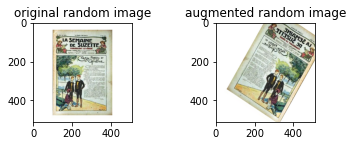

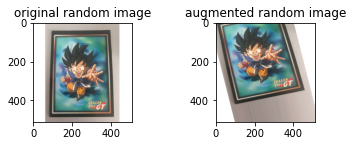

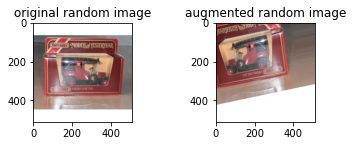

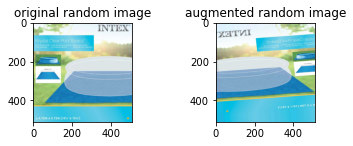

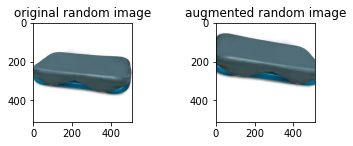

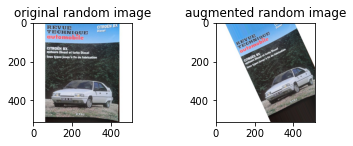

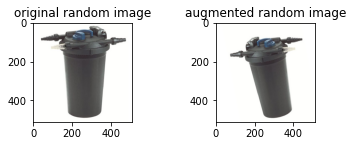

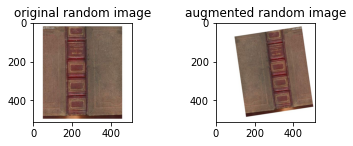

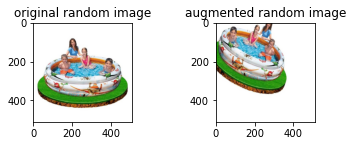

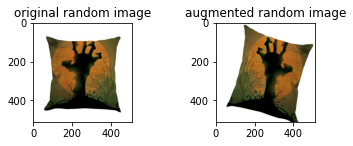

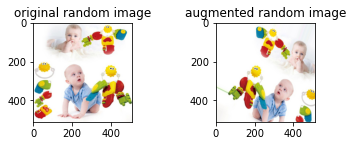

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

batches_real = test_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):

    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]

    title_add_on = "random image"

    if y_batch_augmented[i][1]: title_add_on =  "product"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)
    plt.show()

In [ ]:
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
# Architecture du modèle 1

classifier = Sequential()

conv2d_5 = Conv2D(filters = 32,                     # Nombre de filtres
                kernel_size = (3, 3),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (64, 64, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool2d_6 = MaxPooling2D(pool_size = (2, 2))

conv_2d_6 = Conv2D(filters = 32,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128,
                activation = 'relu')

dense_6 = Dense(units = 27,
                activation = 'softmax')

classifier.add(conv2d_5)
classifier.add(max_pool2d_6)
classifier.add(conv_2d_6)
classifier.add(max_pool_2d_6)
classifier.add(flatten_3)
classifier.add(dense_5)
classifier.add(dense_6)

In [ ]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_15 (Dense)             (None, 27)               

In [ ]:
import keras

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [ ]:
nb_train_samples = 76000
nb_validation_samples = 8400
epochs = 10
batch_size = 100

In [ ]:
history = classifier.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
760/760 [==============================] - 128s 168ms/step - loss: 3.0134 - accuracy: 0.1489 - val_loss: 2.9527 - val_accuracy: 0.1868
Epoch 2/10
760/760 [==============================] - 128s 168ms/step - loss: 2.8700 - accuracy: 0.1949 - val_loss: 2.9646 - val_accuracy: 0.1708
Epoch 3/10
760/760 [==============================] - 127s 167ms/step - loss: 2.8076 - accuracy: 0.2103 - val_loss: 2.9324 - val_accuracy: 0.1741
Epoch 4/10
760/760 [==============================] - 126s 166ms/step - loss: 2.7794 - accuracy: 0.2197 - val_loss: 2.9686 - val_accuracy: 0.1641
Epoch 5/10
760/760 [==============================] - 125s 165ms/step - loss: 2.7367 - accuracy: 0.2272 - val_loss: 2.9317 - val_accuracy: 0.1901
Epoch 6/10
760/760 [==============================] - 126s 166ms/step - loss: 2.7170 - accuracy: 0.2328 - val_loss: 2.9128 - val_accuracy: 0.1812
Epoch 7/10
760/760 [==============================] - 126s 166ms/step - loss: 2.7036 - accuracy: 0.2330 - val_loss: 2.9487 -

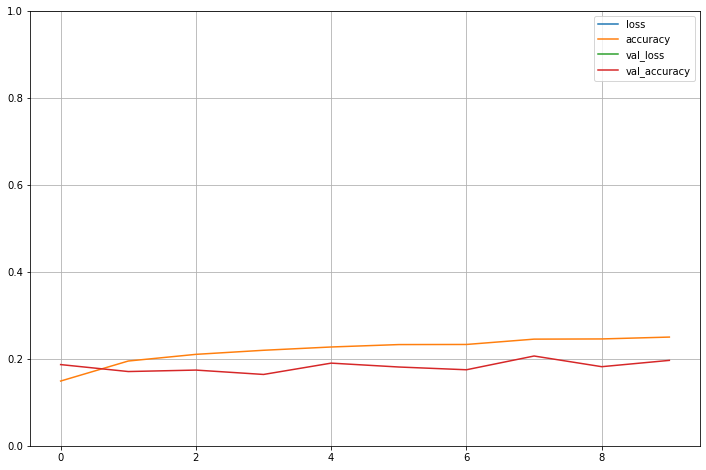

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# test 2

In [ ]:
#APPLY SOME NEW TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (224, 224), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(224,224), batch_size=32, class_mode = 'categorical') ##

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
# Architecture du modèle 2

model2 = Sequential()

model2.add(Conv2D(input_shape=(224, 224, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Flatten())

model2.add(Dense(units=4096,activation="relu"))

model2.add(Dense(units=4096,activation="relu"))

model2.add(Dense(units=27, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model2.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
nb_train_samples = 76000
nb_validation_samples = 8400
epochs = 3
batch_size = 100

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [ ]:
history2 = model2.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size, callbacks=[checkpoint,early])

Epoch 1/3
760/760 [==============================] - 6762s 9s/step - loss: 3.1266 - accuracy: 0.1192 - val_loss: 3.0846 - val_accuracy: 0.1217
Epoch 2/3
153/760 [=====>........................] - ETA: 2:13:23 - loss: 3.0989 - accuracy: 0.1154

KeyboardInterrupt: 

In [ ]:
#APPLY SOME NEW TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (96, 96), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(96,96), batch_size=32, class_mode = 'categorical') #

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


In [ ]:
# Architecture du modèle 3

classifier3 = Sequential()

conv2d_4 = Conv2D(filters = 64,                     
                kernel_size = (3, 3),            
                padding = 'valid',               
                input_shape = (96, 96, 3),      
                activation = 'relu')             

max_pool2d_4 = MaxPooling2D(pool_size = (2, 2))

conv2d_5 = Conv2D(filters = 32,                     
                kernel_size = (3, 3),            
                padding = 'valid',               
                input_shape = (64, 64, 3),       
                activation = 'relu')             

max_pool2d_5 = MaxPooling2D(pool_size = (2, 2))

conv_2d_6 = Conv2D(filters = 32,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2d_6 = MaxPooling2D(pool_size = (2, 2))

flatten_3 = Flatten()

dense_5 = Dense(units = 128,
                activation = 'relu')

dense_6 = Dense(units = 27,
                activation = 'softmax')

classifier3.add(conv2d_4)
classifier3.add(max_pool2d_4)
classifier3.add(conv2d_5)
classifier3.add(max_pool2d_5)
classifier3.add(conv_2d_6)
classifier3.add(max_pool_2d_6)
classifier3.add(flatten_3)
classifier3.add(dense_5)
classifier3.add(dense_6)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier3.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [ ]:
nb_train_samples = 25000
nb_validation_samples = 2500
epochs = 10
batch_size = 100

In [ ]:
history3 = classifier3.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
250/250 [==============================] - 67s 267ms/step - loss: 2.7063 - accuracy: 0.2307 - val_loss: 2.9138 - val_accuracy: 0.1737
Epoch 2/10
250/250 [==============================] - 64s 256ms/step - loss: 2.6973 - accuracy: 0.2348 - val_loss: 2.8453 - val_accuracy: 0.1925
Epoch 3/10
250/250 [==============================] - 65s 259ms/step - loss: 2.6876 - accuracy: 0.2405 - val_loss: 2.8475 - val_accuracy: 0.1900
Epoch 4/10
250/250 [==============================] - 63s 253ms/step - loss: 2.6655 - accuracy: 0.2488 - val_loss: 2.8070 - val_accuracy: 0.2163
Epoch 5/10
250/250 [==============================] - 64s 255ms/step - loss: 2.6641 - accuracy: 0.2399 - val_loss: 2.8621 - val_accuracy: 0.1825
Epoch 6/10
250/250 [==============================] - 63s 252ms/step - loss: 2.6470 - accuracy: 0.2476 - val_loss: 2.8275 - val_accuracy: 0.1713
Epoch 7/10
250/250 [==============================] - 64s 258ms/step - loss: 2.6524 - accuracy: 0.2470 - val_loss: 2.8326 - val_ac

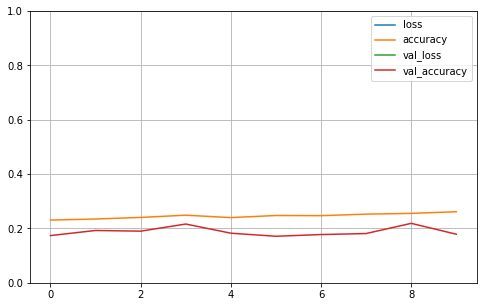

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
####################################################################
https://keras.io/api/applications/

![image.png](attachment:image.png)

![image.png](attachment:image.png)


In [ ]:
from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input, rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/train1',
                                                 target_size = (96, 96), #####
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory ('images/test1', target_size=(96,96), batch_size=32, class_mode = 'categorical') #

Found 76427 images belonging to 27 classes.
Found 8489 images belonging to 27 classes.


In [ ]:
from keras.applications.vgg16 import VGG16

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

modelvgg = Sequential()
modelvgg.add(base_model) # Ajout du modèle VGG16
modelvgg.add(GlobalAveragePooling2D()) 
modelvgg.add(Dense(1024,activation='relu'))
modelvgg.add(Dropout(rate=0.2)) ####
modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dropout(rate=0.2))  ####
modelvgg.add(Dense(units=27, activation='softmax'))

modelvgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
modelvgg.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [ ]:
modelvgg.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 27)              

In [ ]:
nb_train_samples = 76000
nb_validation_samples = 8400
epochs = 5
batch_size = 100

In [ ]:
history4 = modelvgg.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Epoch 1/5
760/760 [==============================] - 293s 386ms/step - loss: 2.6256 - accuracy: 0.2514 - val_loss: 2.5661 - val_accuracy: 0.2578
Epoch 2/5
760/760 [==============================] - 326s 429ms/step - loss: 2.3170 - accuracy: 0.3315 - val_loss: 2.4695 - val_accuracy: 0.2805
Epoch 3/5
760/760 [==============================] - 326s 429ms/step - loss: 2.2299 - accuracy: 0.3510 - val_loss: 2.3519 - val_accuracy: 0.3211
Epoch 4/5
760/760 [==============================] - 322s 424ms/step - loss: 2.1512 - accuracy: 0.3713 - val_loss: 2.4140 - val_accuracy: 0.3110
Epoch 5/5
760/760 [==============================] - 328s 431ms/step - loss: 2.1203 - accuracy: 0.3764 - val_loss: 2.3570 - val_accuracy: 0.3341


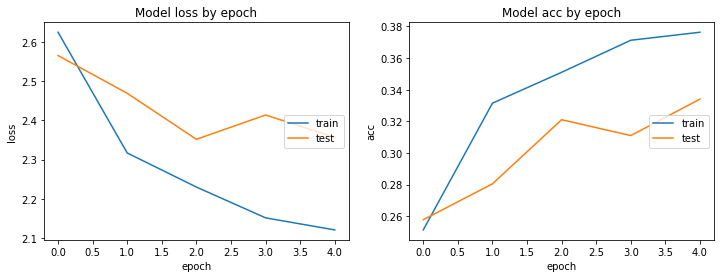

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
modelvgg.compile(loss='categorical_crossentropy',  ### fonction de perte
              optimizer= opt ,               # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

In [ ]:
nb_train_samples = 76000
nb_validation_samples = 8400
epochs = 10
batch_size = 100

In [ ]:
history5 = modelvgg.fit_generator(generator=training_set, epochs = epochs, steps_per_epoch=nb_train_samples // batch_size,
                                   validation_data = test_set, validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
760/760 [==============================] - 457s 602ms/step - loss: 2.0872 - accuracy: 0.3880 - val_loss: 2.2571 - val_accuracy: 0.3683
Epoch 2/10
760/760 [==============================] - 468s 616ms/step - loss: 1.9184 - accuracy: 0.4317 - val_loss: 2.1738 - val_accuracy: 0.3962
Epoch 3/10
760/760 [==============================] - 468s 616ms/step - loss: 1.8485 - accuracy: 0.4554 - val_loss: 2.1786 - val_accuracy: 0.3676
Epoch 4/10
760/760 [==============================] - 470s 618ms/step - loss: 1.7736 - accuracy: 0.4710 - val_loss: 2.0434 - val_accuracy: 0.4025
Epoch 5/10
760/760 [==============================] - 469s 617ms/step - loss: 1.7390 - accuracy: 0.4838 - val_loss: 2.0554 - val_accuracy: 0.4070
Epoch 6/10
760/760 [==============================] - 469s 617ms/step - loss: 1.6631 - accuracy: 0.5063 - val_loss: 2.1009 - val_accuracy: 0.3996
Epoch 7/10
760/760 [==============================] - 469s 617ms/step - loss: 1.6418 - accuracy: 0.5092 - val_loss: 1.9928 -

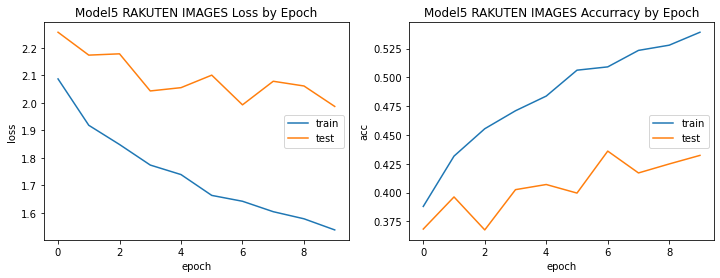

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model5 RAKUTEN IMAGES Loss by Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model5 RAKUTEN IMAGES Accurracy by Epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test','val'], loc='right')
plt.show()

In [ ]:
#### RESNET TRIAL
https://machinelearningknowledge.ai/keras-implementation-of-resnet-50-architecture-from-scratch/
    
https://keras.io/api/applications/resnet/

In [ ]:
import tensorflow as tf

tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    )

102973440/102967424 [==============================] - 9s 0us/step
